In [ ]:
%pip install pycountry
%pip install geopandas
%pip install mapclassify

In [340]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import cm
from dateutil.parser import parse
import pycountry
import geopandas
import mapclassify.classifiers as classifiers
import plotly.express as px

In [2]:
# Reading the required file
netflix = pd.read_csv('/netflix_titles.csv')

In [4]:
# Total countries that make films in netflix
countries = netflix.country
indices = countries[countries.str.contains(',') == True].index
countries.drop(indices, inplace=True)
print(countries.drop_duplicates().shape[0])

70


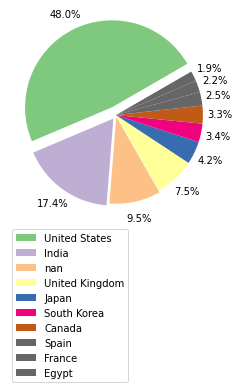

In [5]:
# Top 10 countries in producing
countries = netflix.country
country = []
count = []

order = (Counter(countries.values).most_common(10))
for i in order:
  country.append(i[0])
  count.append(i[1])

explodes = [0 for i in range(10)]
explodes[0] = 0.1
explodes[1] = 0.05
explodes[2] = 0.02
plt.pie(count, explode=explodes, startangle=30, 
        autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,
        colors=plt.cm.Accent(np.arange(10)))
plt.legend(loc='upper left', bbox_to_anchor=(0,0), labels=country)
plt.show()

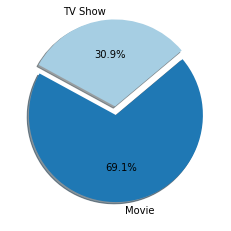

In [6]:
# Total percentage of movies and TV Shows
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

plt.pie([tv_shows.shape[0], movies.shape[0]], labels=['TV Show', 'Movie'],
        autopct='%1.1f%%', startangle=40, shadow=[1, 1], explode=[0.1, 0], 
        colors=plt.cm.Paired(np.arange(2)))
plt.show()

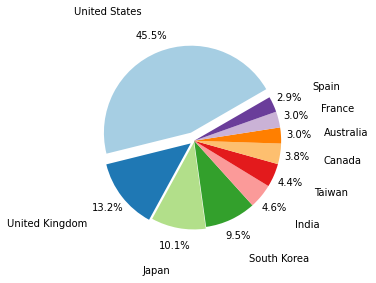

In [7]:
# Top 10 countries in producing TV Shows
countries = tv_shows.country.dropna()
country = []
count = []

order = (Counter(countries.values).most_common(10))
for i in order:
  country.append(i[0])
  count.append(i[1])

explodes = [0 for i in range(10)]
explodes[0] = 0.1
explodes[1] = 0.05
explodes[2] = 0.02
plt.pie(count, labels=country, explode=explodes, startangle=30, 
        autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,
        colors=plt.cm.Paired(np.arange(10)))
plt.show()

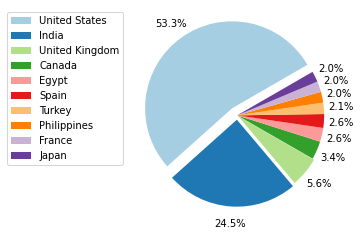

In [8]:
# Top 10 countries in producing movies
countries = movies.country.dropna()
country = []
count = []

order = (Counter(countries.values).most_common(10))
for i in order:
  country.append(i[0])
  count.append(i[1])


explodes = [0 for i in range(10)]
explodes[0] = 0.1
explodes[1] = 0.05
explodes[2] = 0.02
plt.pie(count, explode=explodes, startangle=30, 
        autopct='%1.1f%%', pctdistance=1.2, colors=plt.cm.Paired(np.arange(len(country))))
plt.legend(bbox_to_anchor=(0,1), labels=country)
plt.show()

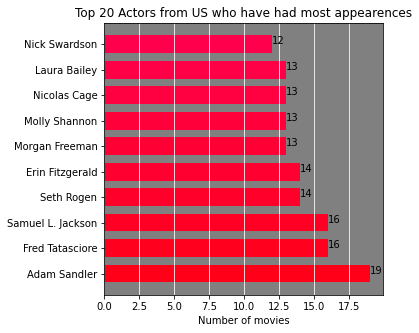

In [9]:
# Top 10 actors from US that have had the most appearances all time in all types
cast = netflix[netflix.country == 'United States'].cast.copy()
cast.dropna(inplace=True)
people = []
for group in cast:
  people.extend([person for person in group.split(', ')])

top_20_stars = []
feature_count = []
order = (Counter(people).most_common(10))
for i in order:
  top_20_stars.append(i[0])
  feature_count.append(i[1])

fig = plt.figure(figsize=(5, 5))
plt.xlabel('Number of movies')
for index, value in enumerate(feature_count):
  plt.text(value, index, str(value))
plt.barh(top_20_stars, feature_count, height=0.7, color=plt.cm.hsv_r(np.arange(10)))
plt.title("Top 20 Actors from US who have had most appearences")
plt.grid(color='w', axis='x')
plt.gca().patch.set_facecolor('0.5')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


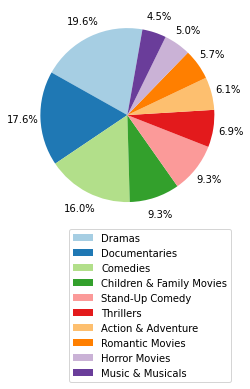

In [10]:
# Top 9 kind of movies people in India loves the most in recent years other than International and Independent movies
movies_in_india = movies[movies.country == 'United States'][movies.release_year > 2008]
type_of_movies = []
for movie in movies_in_india.listed_in.values:
  for i in movie.split(', '):
    if i not in ['International Movies', 'Independent Movies']:
      type_of_movies.append(i)

order = Counter(type_of_movies).most_common(10)
types = [i[0] for i in order]
number = [i[1] for i in order]
plt.pie(number, startangle=80, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.2, colors=plt.cm.Paired(np.arange(len(types))))
plt.legend(bbox_to_anchor=(1, 0), labels=types)
plt.show()

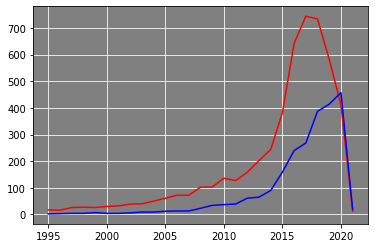

In [11]:
# Growth in movie releases since 1995
movie_releases = list(movies.release_year.values)
TV_show_releases = list(tv_shows.release_year.values)
start_year = 1995
end_year = max(max(movie_releases), max(TV_show_releases))
years = list(range(start_year, end_year + 1))

mv = []
tv = []
for i in years:
  mv.append(movie_releases.count(i))
  tv.append(TV_show_releases.count(i))

plt.plot(years, mv, c='r')
plt.plot(years, tv, c='b')
plt.grid(c='w')
plt.gca().patch.set_facecolor('0.5')
plt.show()

In [187]:
# Geographical map
countrys = []
for i in netflix.country.dropna():
  countrys.extend(country for country in i.split(', ') if ',' not in country)
data = {country: num for country, num in Counter(countrys).most_common()}

data = {'countries': data.keys(), 'numbers': data.values()}
data = pd.DataFrame(data)

code = []
for country in data.countries.values:
  try:
    code.append(pycountry.countries.search_fuzzy(country)[0].alpha_3)
  except:
    code.append(' ')

data['iso_a3'] = code

In [350]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['numbers'] = 0
merge = world.copy()

for num, i in enumerate(world.iso_a3.values):
  if i in data.iso_a3.values:
    index = merge[merge.iso_a3 == i].index
    merge.loc[index, 'numbers'] = data.loc[data[data.iso_a3 == i].index, 'numbers'].values[0]

In [371]:
px.choropleth(data_frame=merge, locations="iso_a3", color="numbers", color_continuous_scale="blues", hover_name="name")